# Исследовательский анализ данных

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [6]:
print(labels.shape)

(7591, 2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d35de0810>]],
      dtype=object)

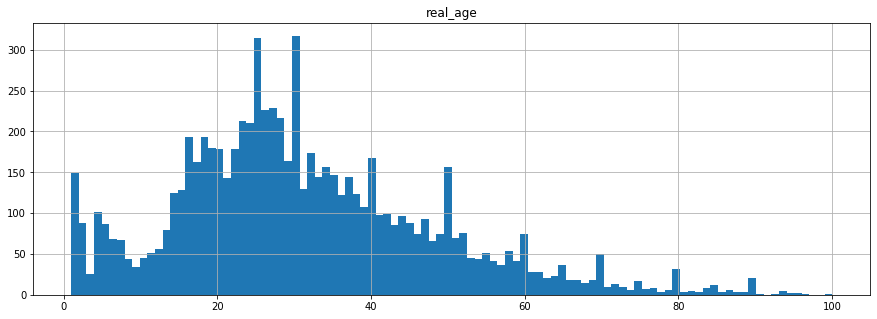

In [15]:
labels.hist(bins=100, figsize=(15,5))

In [8]:
print(labels.describe())

          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000


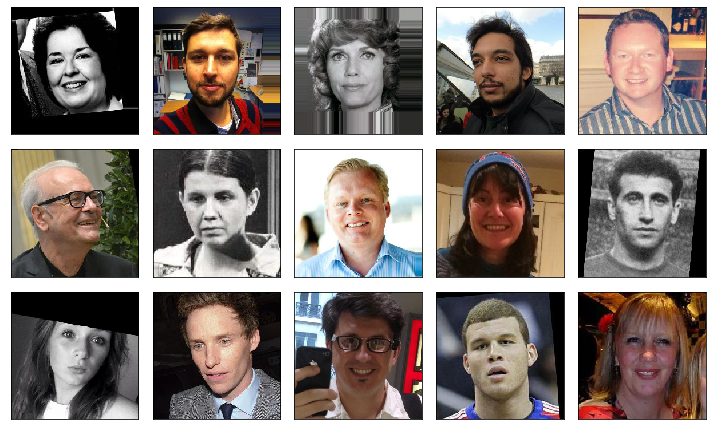

In [12]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**Вывод:**  

В загруженном датасете 7591 фотографии.

Больше всего фотографий в диапазоне от 15 до 41 года. Также в выборке есть дети и люди в возрасте.

Анализируя фотографии видно что по многим будет непросто оценивать возраст. Так как есть фотографии не в фокусе,  в дополнительной рамке, боком и т.д. Также на фотографиях есть объекты, которые закрывают лицо: телефон, рука, очки и т.д